In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geopandas import points_from_xy

from shapely.geometry import LineString


### Load data

In [2]:
birds_df = pd.read_csv("../../geospatial-learn-course-data/purple_martin.csv", parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))
# birds_df.head()

There are 11 different birds in the dataset.


In [3]:
birds = gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df["location-long"], birds_df["location-lat"]))
birds.crs = "EPSG:4326"
display(birds)

,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.2435 13.09578)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77683 -11.7239)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.24154 -11.61224)
...,...,...,...,...,...
94,2014-12-30 19:59:00,-50.709645,-9.572583,30263,POINT (-50.70964 -9.57258)
95,2015-01-14 23:59:00,-49.292113,-8.392265,30263,POINT (-49.29211 -8.39226)
96,2015-01-30 03:59:00,-49.081317,-5.413250,30263,POINT (-49.08132 -5.41325)
97,2015-02-14 07:59:00,-49.081245,-5.413251,30263,POINT (-49.08124 -5.41325)


### Plot data

In [4]:
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
americas = world.loc[world["CONTINENT"].isin(["North America","South America"])]
# display(americas)

<Axes: >

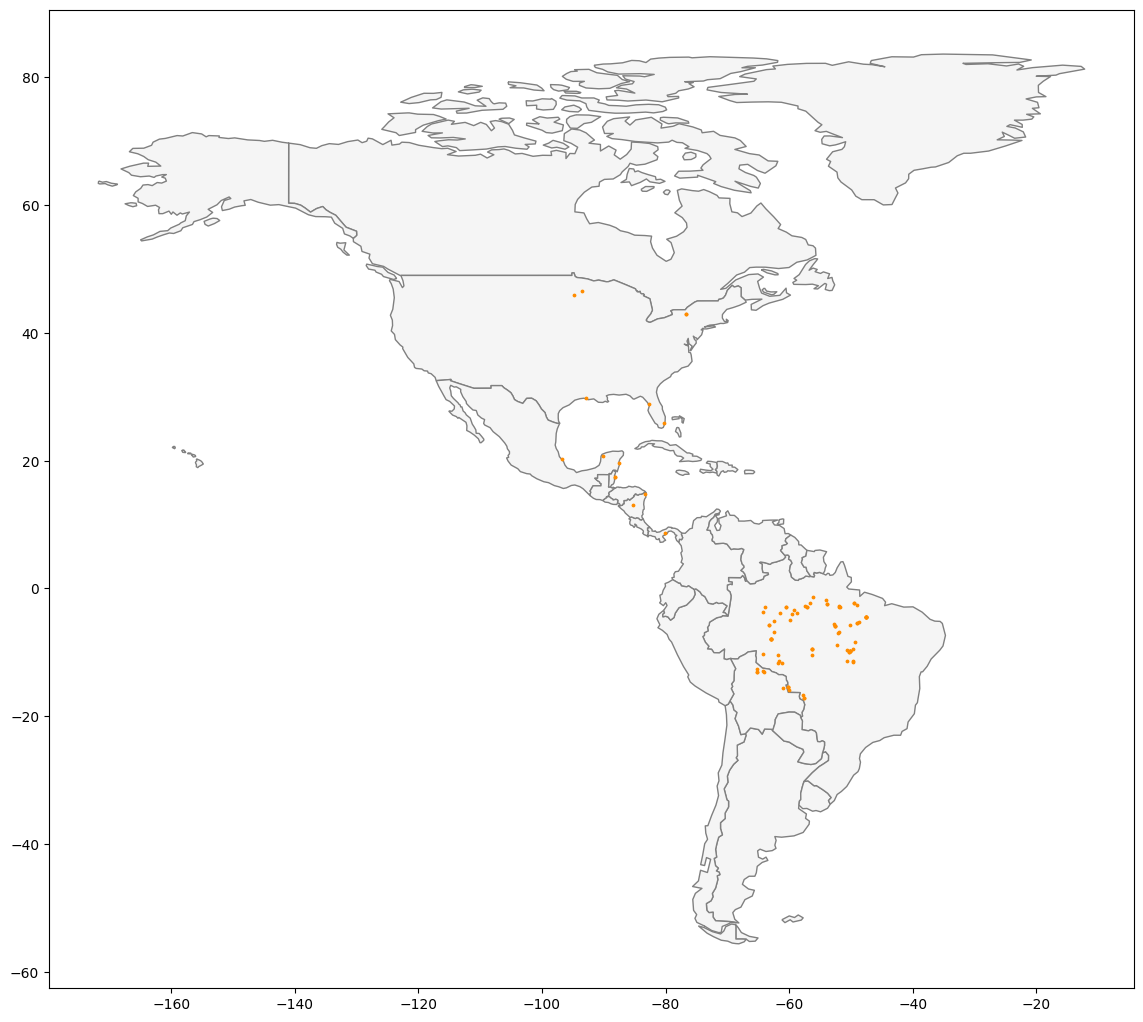

In [5]:
fig, ax = plt.subplots(figsize=(14,14))
americas.plot(ax=ax, color='whitesmoke', edgecolor='gray', zorder=1)
birds.plot(ax=ax, markersize=3, color='darkorange', zorder=2)

### Where does each bird start and end its journey? (Part 1)

In [6]:
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = "EPSG:4326"

start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = "EPSG:4326"

end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = "EPSG:4326"

<Axes: >

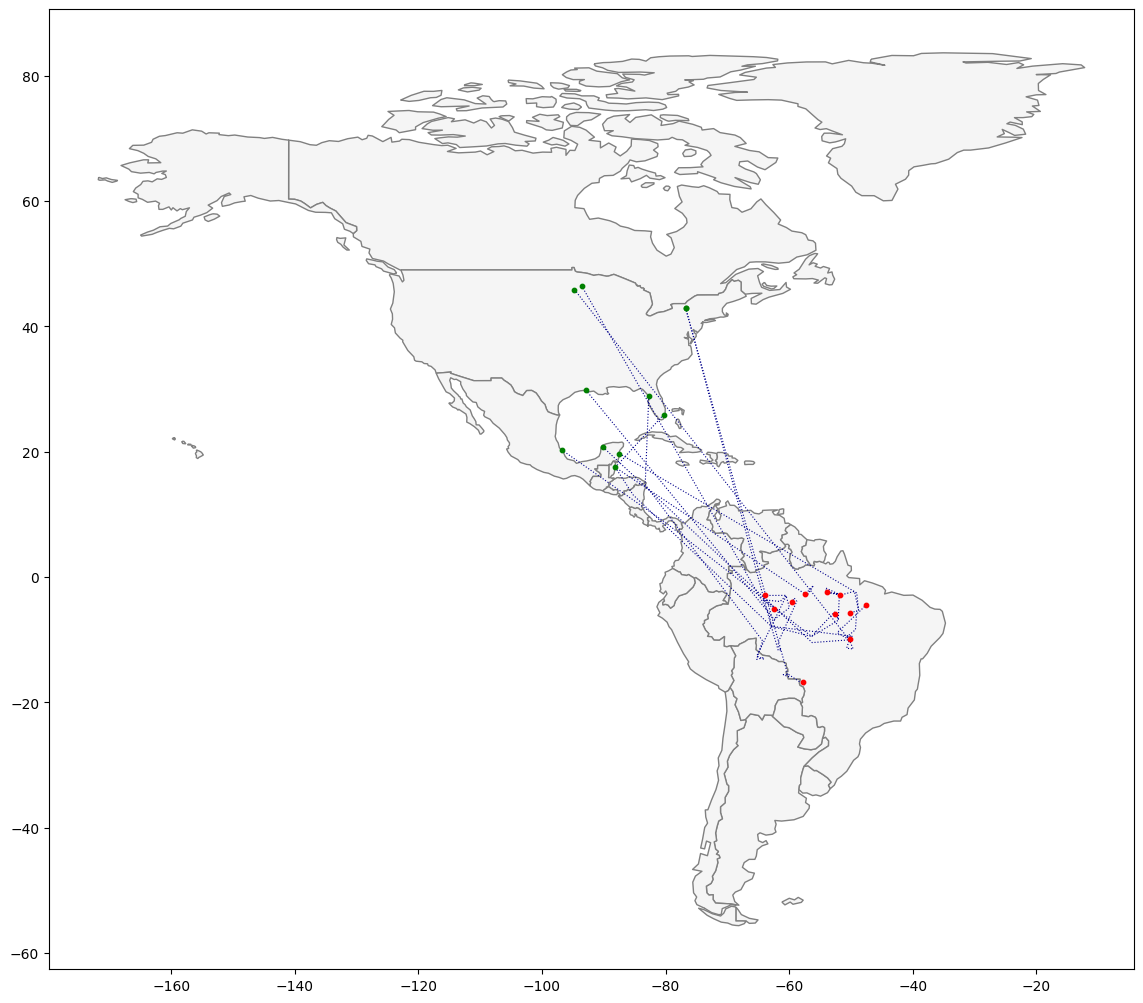

In [7]:
fig, ax = plt.subplots(figsize=(14,14))
americas.plot(ax=ax, color='whitesmoke', edgecolor='gray', zorder=1)
path_gdf.plot(ax=ax, color='darkblue', zorder=2, linestyle=':', linewidth=0.8)
start_gdf.plot(ax=ax, color='green', markersize=10, zorder=3)
end_gdf.plot(ax=ax, color='red', markersize=10, zorder=4)

### Where are the protected areas in South America

In [8]:
protected_areas = gpd.read_file("../../geospatial-learn-course-data/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp")
protected_areas.crs = "EPSG:3035"

In [9]:
south_america = americas.loc[americas.CONTINENT == "South America"]

<Axes: >

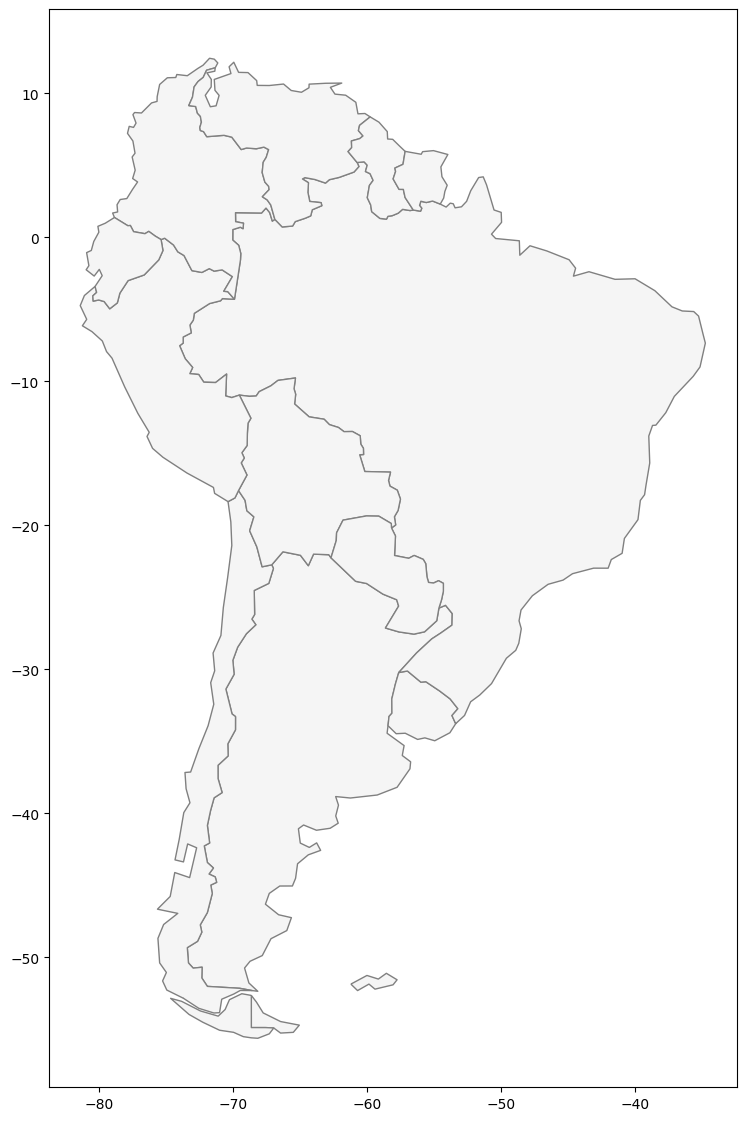

In [10]:
fig, ax = plt.subplots(figsize=(14,14))
south_america.plot(ax=ax, color='whitesmoke', edgecolor='gray', zorder=1)

### What percentage of South America is protected

In [21]:
P_Area = sum(protected_areas["REP_AREA"]-protected_areas["REP_M_AREA"])
print(f"South America has {P_Area} square kilometers of protected areas")

south_america.crs = "EPSG:3035"
totalArea = sum(south_america.geometry.area / 10**6)
print(f"South America has {totalArea} square kilometers")
print(f"Approximately {round((P_Area/totalArea)*100,2)}% of South America is protected.")

South America has 5396761.911688372 square kilometers of protected areas
South America has 0.0015479576927617457 square kilometers
Approximately 348637558825.0% of South America is protected.


### Where are the birds in South America

<Axes: >

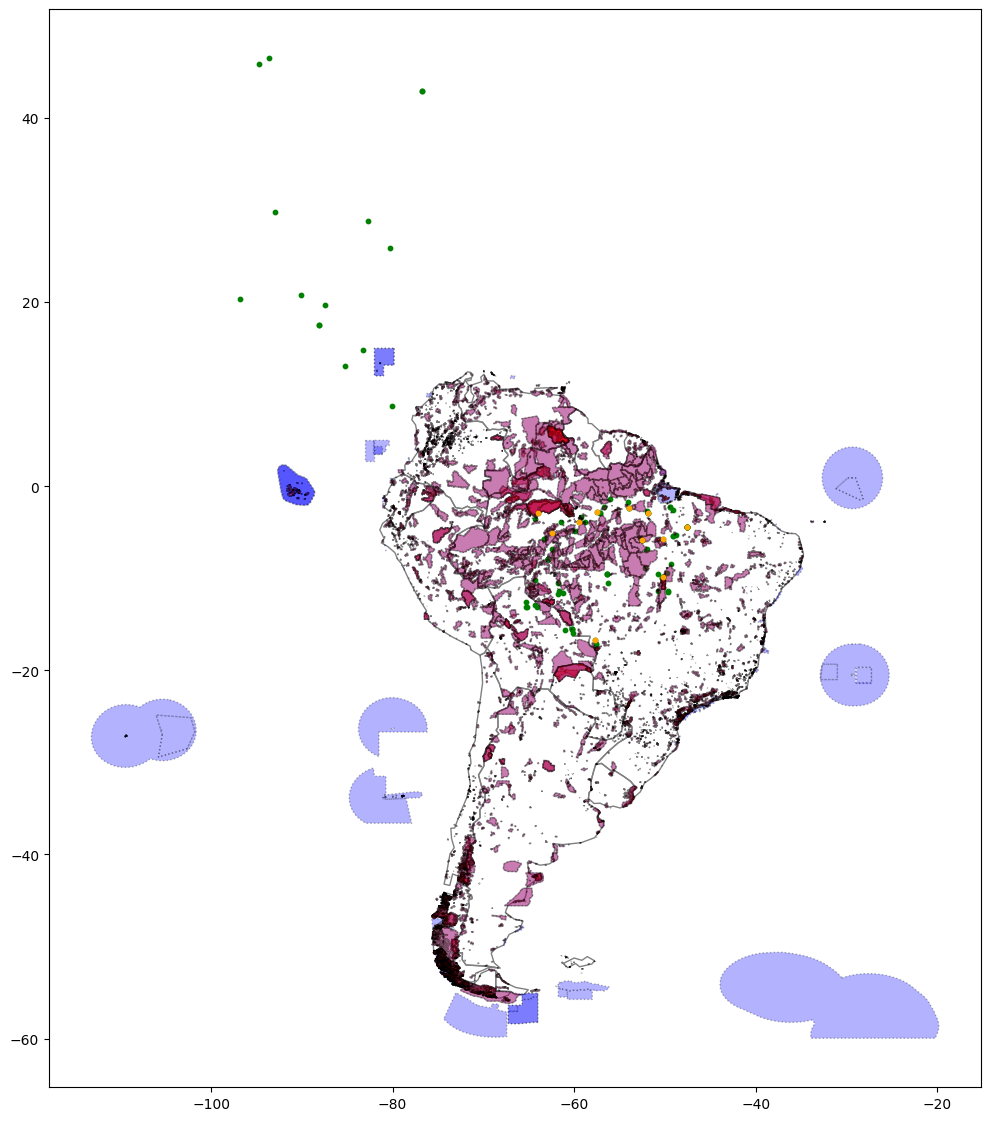

In [16]:
fig, ax = plt.subplots(figsize=(14,14))
south_america.plot(ax=ax, color='none', edgecolor='gray', zorder=1)
birds.plot(ax=ax, color='green', markersize=10, zorder=2)

protected_areas.plot(ax=ax, color='blue', edgecolor='black', alpha=0.3, zorder=3, linestyle=":")
protected_areas_no_marine = protected_areas.loc[protected_areas["MARINE"] != '2']
protected_areas_no_marine.plot(ax=ax, color='red', edgecolor='black', alpha=0.3, zorder=3)
end_gdf.plot(ax=ax, color='orange', markersize=10, zorder=4)